In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
data = pd.read_csv('/content/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,...,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000
mean,2677.615501,-0.266159,0.285505,0.844231,0.104200,0.000709,0.194948,0.018324,-0.039006,0.396916,...,-0.043098,-0.161548,-0.036483,0.028960,0.089873,-0.040197,0.025234,0.006116,65.061811,0.000502
std,1765.025532,1.395405,1.208867,1.031448,1.442339,1.185900,1.365525,1.059870,1.304005,1.047749,...,0.883330,0.646380,0.373210,0.619810,0.407680,0.488284,0.364482,0.265131,192.490314,0.022407
min,0.000000,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-12.968670,-23.632502,-3.336805,...,-11.468435,-8.454599,-7.996811,-2.512377,-2.322906,-1.338556,-7.976100,-2.909294,0.000000,0.000000
25%,1162.250000,-1.015749,-0.280054,0.295701,-0.839417,-0.609206,-0.677720,-0.492968,-0.189736,-0.264280,...,-0.260507,-0.594625,-0.187108,-0.350226,-0.152744,-0.399334,-0.049681,-0.017776,4.450000,0.000000
50%,2537.000000,-0.420703,0.346083,0.882882,0.161767,-0.083983,-0.142606,0.041761,0.037831,0.360826,...,-0.111701,-0.177197,-0.046772,0.094946,0.106290,-0.079583,0.015976,0.019417,15.620000,0.000000
75%,3781.750000,1.115402,0.941548,1.504158,1.071412,0.441406,0.605784,0.566306,0.343067,0.961662,...,0.059809,0.273148,0.088154,0.435670,0.355157,0.245560,0.155281,0.082701,56.660000,0.000000
max,6645.000000,1.685314,7.467017,4.101716,6.013346,10.658654,21.393069,34.303177,3.877662,9.272376,...,22.580675,4.393846,4.095021,3.200201,1.972515,3.463246,3.852046,4.860769,7712.430000,1.000000


<Axes: ylabel='Count'>

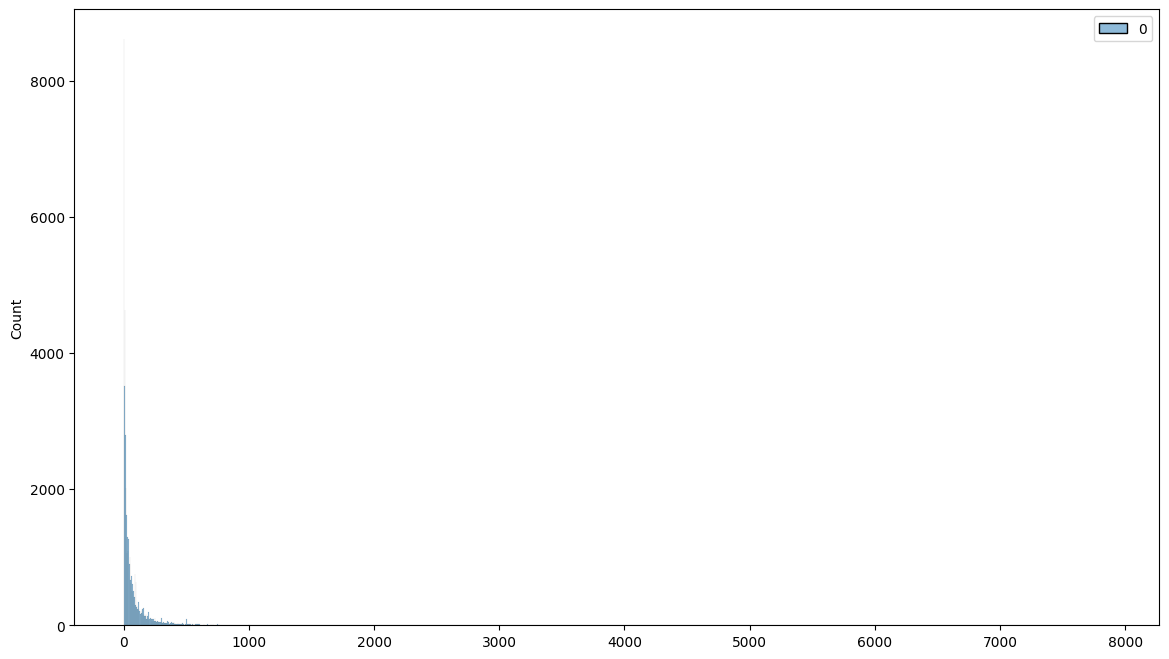

In [ ]:
amount = [data['Amount'].values]
sns.histplot(amount)

<Axes: ylabel='Count'>

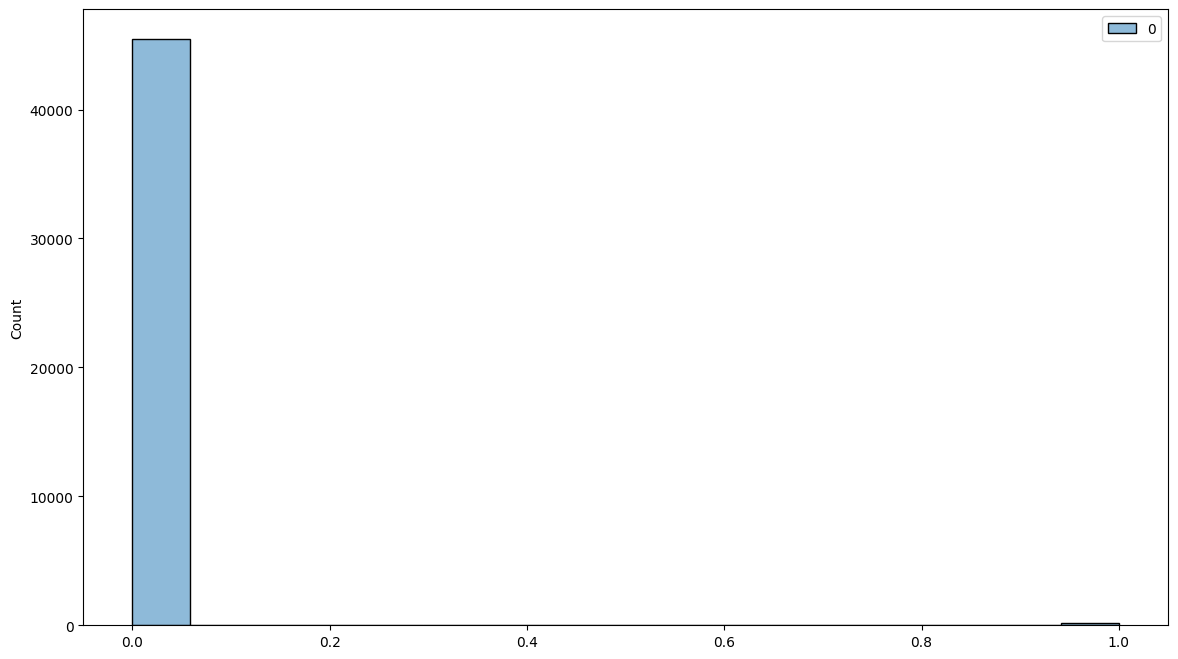

In [ ]:
Class = [data['Class'].values]
sns.histplot(Class)

Fraudulent Cases: 142
Valid Transactions: 45503
Proportion of Fraudulent Cases: 0.0031108969022477324


<Axes: ylabel='count'>

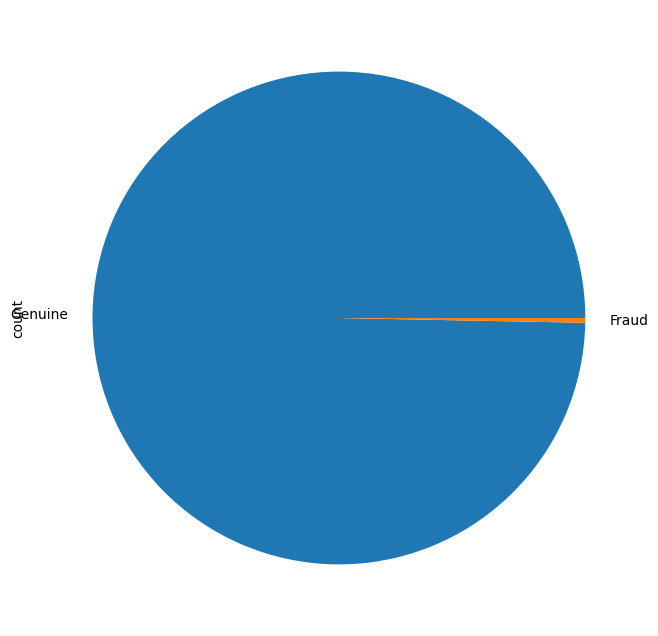

In [ ]:
print("Fraudulent Cases: " + str(len(data[data["Class"] == 1])))
print("Valid Transactions: " + str(len(data[data["Class"] == 0])))
print("Proportion of Fraudulent Cases: " + str(len(data[data["Class"] == 1])/ data.shape[0]))


data_p = data.copy()
data_p[" "] = np.where(data_p["Class"] == 1 ,  "Fraud", "Genuine")

data_p[" "].value_counts().plot(kind="pie")

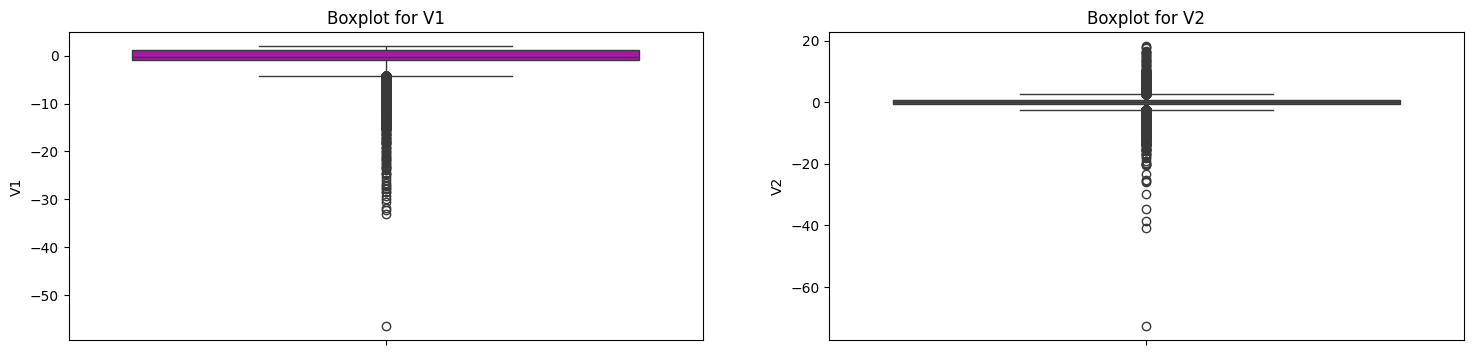

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(18,4), sharex = True)

variable1 = data["V1"]
variable2 = data["V2"]

sns.boxplot(variable1, color="m", ax=axes[0]).set_title('Boxplot for V1')
sns.boxplot(variable2, color="m", ax=axes[1]).set_title('Boxplot for V2')

plt.show()

RANDOM FOREST

In [ ]:
print('Valid transaction',len(data[data['Class']==0]))
print('fraud transaction',len(data[data['Class']==1]))

Valid transaction 5970
fraud transaction 3


In [ ]:
y= data['Class']
x= data.drop(columns=['Class'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [ ]:
#imbalance in the data
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0030749141761967943
Fraud Cases: 146
Valid Transactions: 47481


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
y_true_fixed = np.where(np.isnan(y_test), -1, y_test)
y_pred_trimmed = y_pred[:len(y_true_fixed)]
print('Classification report:\n', classification_report(y_true_fixed, y_pred_trimmed))
conf_mat = confusion_matrix(y_true=y_true_fixed, y_pred=y_pred_trimmed)
print('Confusion matrix:\n', conf_mat)


Classification report:
               precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         1
         0.0       1.00      1.00      1.00      1790
         1.0       0.00      0.00      0.00         2

    accuracy                           1.00      1793
   macro avg       0.33      0.33      0.33      1793
weighted avg       1.00      1.00      1.00      1793

Confusion matrix:
 [[   0    1    0]
 [   0 1790    0]
 [   0    2    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=30,criterion='entropy', random_state=0,max_depth=10)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=30,
                       random_state=0)

In [ ]:
# Drop rows with NaN values
x_test_clean = x_test.dropna()

# Use the cleaned data for prediction
y_pred_2 = classifier.predict(x_test_clean)



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.validation import check_consistent_length
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Generate synthetic data for demonstration purposes
X, y = make_classification(n_samples=2000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (example: Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Check and ensure consistent length between y_true (y_test) and y_pred
check_consistent_length(y_test, y_pred)

# Now that lengths are consistent, proceed with generating classification report and confusion matrix
print('Classifcation report:\n', classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)


Classifcation report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       204
           1       0.88      0.92      0.90       196

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400

Confusion matrix:
 [[180  24]
 [ 15 181]]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


DECISION TREE

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import math
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('/content/creditcard.csv')

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45646 entries, 0 to 45645
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    45646 non-null  int64  
 1   V1      45646 non-null  float64
 2   V2      45646 non-null  float64
 3   V3      45646 non-null  float64
 4   V4      45646 non-null  float64
 5   V5      45646 non-null  float64
 6   V6      45645 non-null  float64
 7   V7      45645 non-null  float64
 8   V8      45645 non-null  float64
 9   V9      45645 non-null  float64
 10  V10     45645 non-null  float64
 11  V11     45645 non-null  float64
 12  V12     45645 non-null  float64
 13  V13     45645 non-null  float64
 14  V14     45645 non-null  float64
 15  V15     45645 non-null  float64
 16  V16     45645 non-null  float64
 17  V17     45645 non-null  float64
 18  V18     45645 non-null  float64
 19  V19     45645 non-null  float64
 20  V20     45645 non-null  float64
 21  V21     45645 non-null  float64
 22

In [ ]:
x = data.iloc[: , 1:30].values
y = data.iloc[:, 30].values

In [ ]:
print("Input Range : ", x.shape)
print("Output Range : ", y.shape)

Input Range :  (45646, 29)
Output Range :  (45646,)


In [ ]:
print ("Class Labels : \n", y)

Class Labels : 
 [ 0.  0.  0. ...  0.  0. nan]


In [ ]:
data.isnull().values.any()

True

Text(0, 0.5, 'No of occurences')

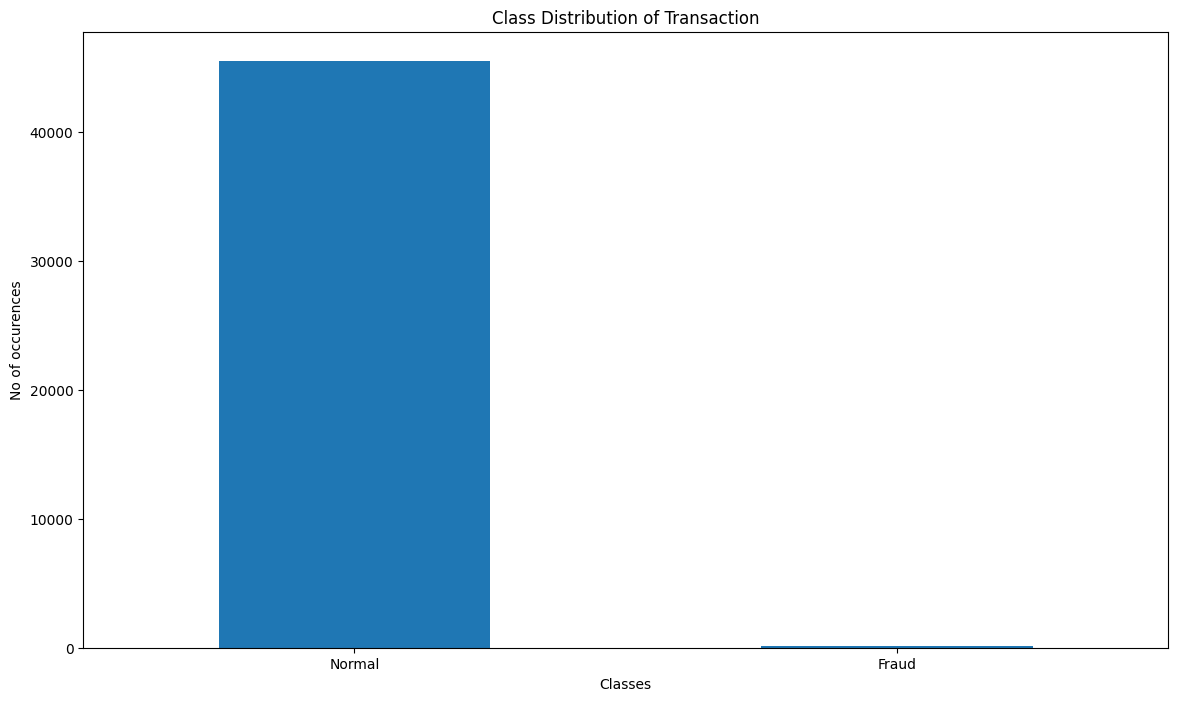

In [ ]:
set_class = pd.value_counts(data['Class'], sort = True)

set_class.plot(kind = 'bar', rot=0)

plt.title("Class Distribution of Transaction")

plt.xticks(range(2), LABELS)

plt.xlabel("Classes")

plt.ylabel("No of occurences")

In [ ]:
fraud_data = data[data['Class']==1]

normal_data = data[data['Class']==0]

In [ ]:
fraud_data.Amount.describe()

count     142.000000
mean       97.592183
std       233.185192
min         0.000000
25%         1.000000
50%         8.370000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
normal_data.Amount.describe()

count    45503.000000
mean        90.808470
std        240.322652
min          0.000000
25%          7.580000
50%         24.990000
75%         82.360000
max       7879.420000
Name: Amount, dtype: float64

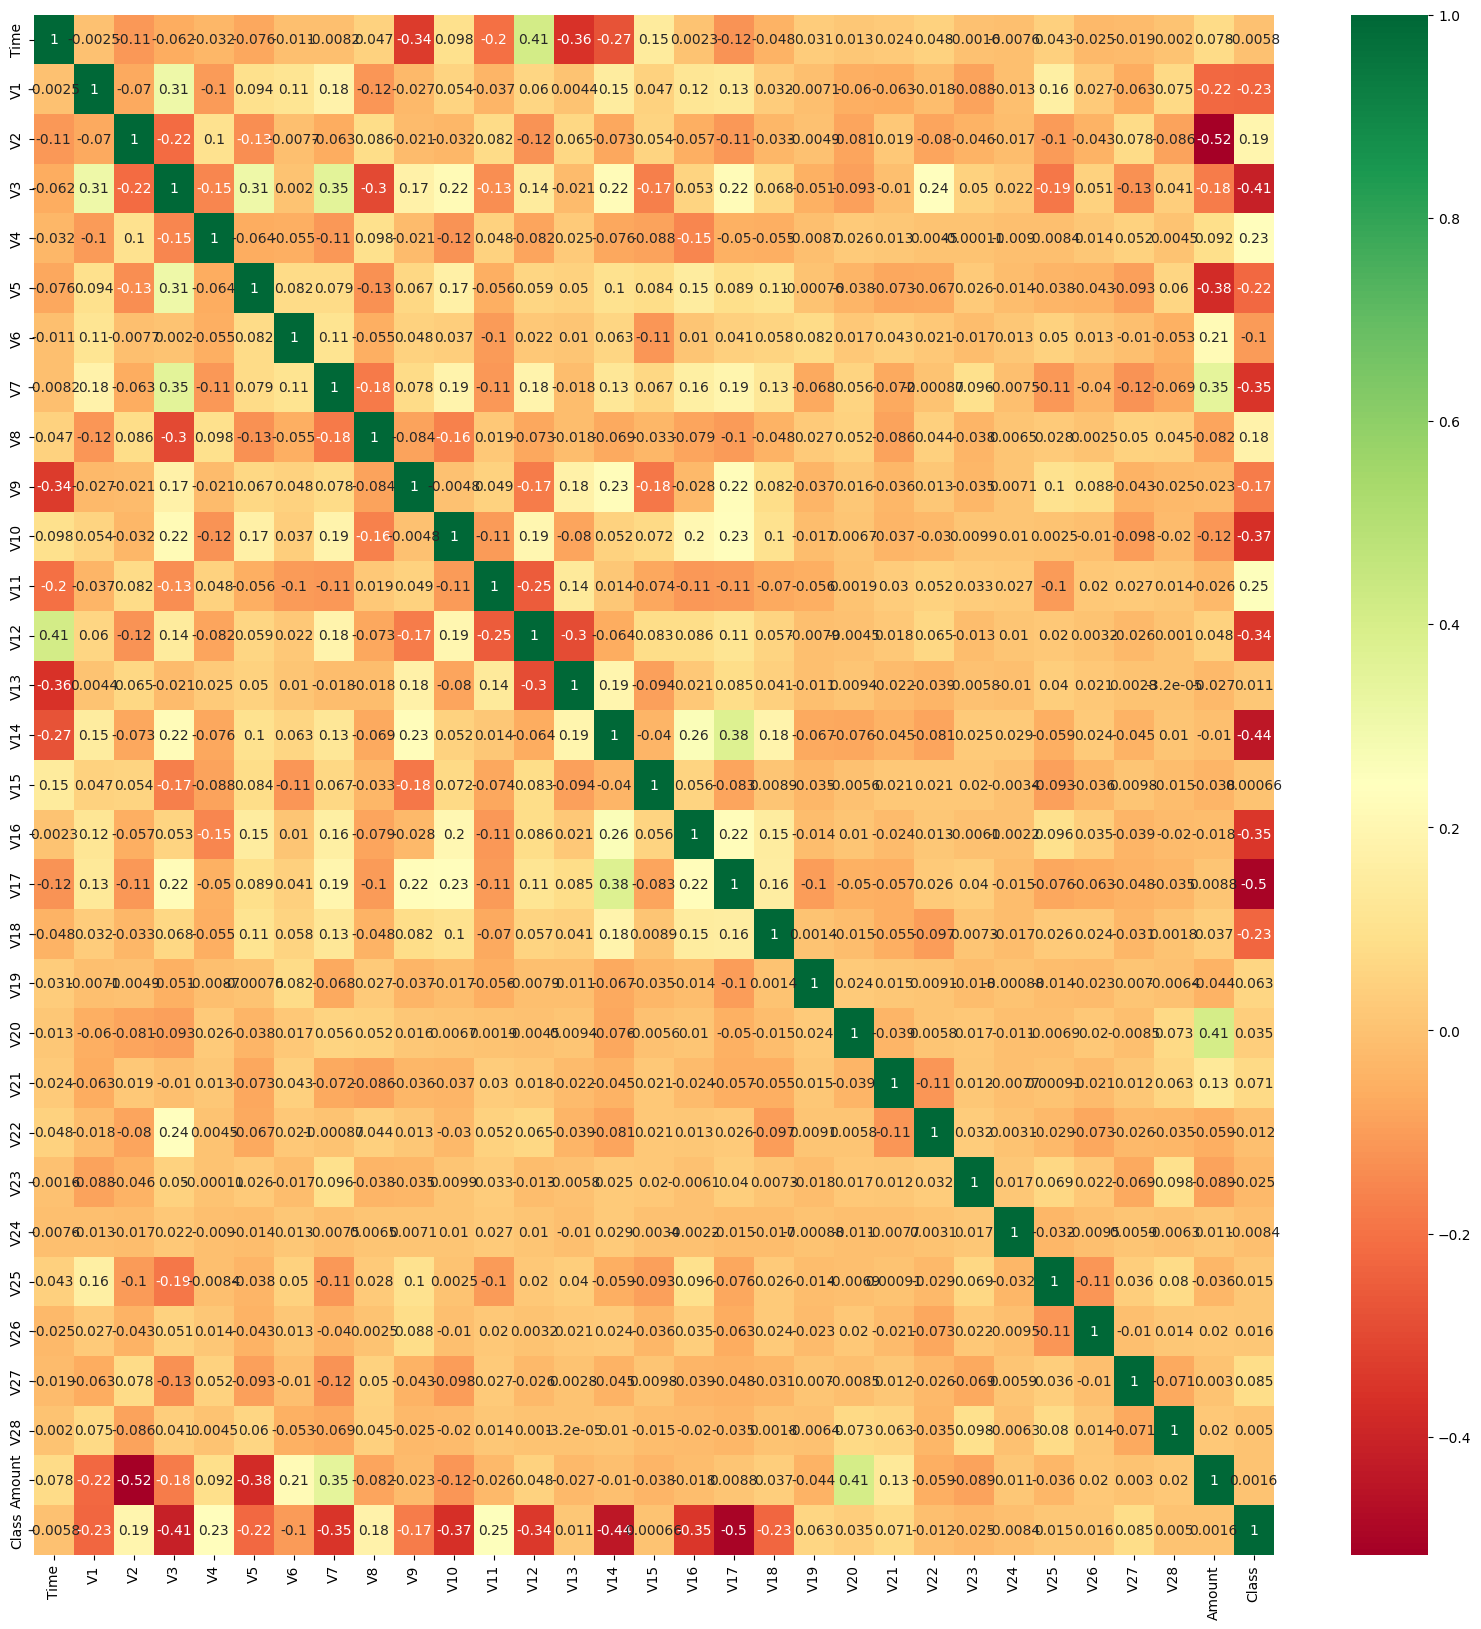

In [ ]:
import seaborn as sns
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.validation import check_consistent_length
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state = 0)

In [ ]:
print("xtrain.shape : ", xtrain.shape)
print("xtest.shape  : ", xtest.shape)
print("ytrain.shape : ", ytrain.shape)
print("ytest.shape  : ", ytest.shape)

xtrain.shape :  (34234, 29)
xtest.shape  :  (11412, 29)
ytrain.shape :  (34234,)
ytest.shape  :  (11412,)


In [ ]:
stdsc = StandardScaler()
xtrain = stdsc.fit_transform(xtrain)
xtest = stdsc.transform(xtest)

In [ ]:
print("Training Set after Standardised : \n", xtrain[0])

Training Set after Standardised : 
 [-0.09152178  0.44983611  0.26215659  0.49004112  0.43042655 -0.52418738
  0.7942426  -0.19594706 -0.70316068 -0.17318514 -1.0433961   0.25421117
  0.26353067  0.06469625  0.93779457 -0.22761808 -0.40280002  0.3486363
  0.71134844  0.2210396   0.30012912  0.89567988 -0.01636534  0.06087941
 -0.69192285 -0.67327298  0.37428535  0.46822174 -0.11808202]


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming xtrain and ytrain are your input features and labels
# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=0)

# Create an imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
xtrain_imputed = imputer.fit_transform(xtrain)
xtest_imputed = imputer.transform(xtest)

# Ensure ytrain does not contain NaNs
ytrain = np.nan_to_num(ytrain)

# Initialize and fit the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_classifier.fit(xtrain_imputed, ytrain)



DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred_decision_tree = dt_classifier.predict(xtest)

In [ ]:
print("y_pred_decision_tree : \n", y_pred_decision_tree)

y_pred_decision_tree : 
 [0. 0. 0. ... 0. 0. 0.]


In [ ]:
com_decision = confusion_matrix(ytest, y_pred_decision_tree)
print("confusion Matrix : \n", com_decision)

confusion Matrix : 
 [[11371     3]
 [    5    33]]


K NEAREST NEIGHBORS


In [ ]:
Accuracy_Model = ((com_decision[0][0] + com_decision[1][1]) / com_decision.sum()) *100
print("Accuracy_Decison    : ", Accuracy_Model)

Error_rate_Model= ((com_decision[0][1] + com_decision[1][0]) / com_decision.sum()) *100
print("Error_rate_Decison  : ", Error_rate_Model)

# True Fake Rate
Specificity_Model= (com_decision[1][1] / (com_decision[1][1] + com_decision[0][1])) *100
print("Specificity_Decison : ", Specificity_Model)

# True Genuine Rate
Sensitivity_Model = (com_decision[0][0] / (com_decision[0][0] + com_decision[1][0])) *100
print("Sensitivity_Decison : ", Sensitivity_Model)

Accuracy_Decison    :  99.92989835261129
Error_rate_Decison  :  0.07010164738871363
Specificity_Decison :  91.66666666666666
Sensitivity_Decison :  99.95604781997187


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
data = pd.read_csv('/content/creditcard.csv')
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9995259997893332

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.78      0.85        98

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962

